In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PowerTransformer
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("student_performance.csv")

In [3]:
df

,Student,Age,Study_Hours,Attendance_Percentage,Test_Score
0,Aarav,16,2,80,65
1,Priya,17,4,90,78
2,Rohan,18,6,60,70
3,Isha,17,3,85,75
4,Dev,19,1,50,60


In [4]:
features = ["Age", "Study_Hours", "Attendance_Percentage", "Test_Score"]
X = df[features]

In [5]:
X

,Age,Study_Hours,Attendance_Percentage,Test_Score
0,16,2,80,65
1,17,4,90,78
2,18,6,60,70
3,17,3,85,75
4,19,1,50,60


In [6]:
min_max_scaler = MinMaxScaler()
X_normalized = pd.DataFrame(min_max_scaler.fit_transform(X), columns=[f"{col}_Norm" for col in X.columns])

In [7]:
X_normalized

,Age_Norm,Study_Hours_Norm,Attendance_Percentage_Norm,Test_Score_Norm
0,0.000000,0.2,0.750,0.277778
1,0.333333,0.6,1.000,1.000000
2,0.666667,1.0,0.250,0.555556
3,0.333333,0.4,0.875,0.833333
4,1.000000,0.0,0.000,0.000000


In [8]:
standard_scaler = StandardScaler()
X_standardized = pd.DataFrame(standard_scaler.fit_transform(X), columns=[f"{col}_Std" for col in X.columns])

In [9]:
X_standardized 

,Age_Std,Study_Hours_Std,Attendance_Percentage_Std,Test_Score_Std
0,-1.372813,-0.697486,0.455661,-0.704448
1,-0.392232,0.464991,1.106606,1.286384
2,0.588348,1.627467,-0.846228,0.061256
3,-0.392232,-0.116248,0.781133,0.826961
4,1.568929,-1.278724,-1.497172,-1.470153


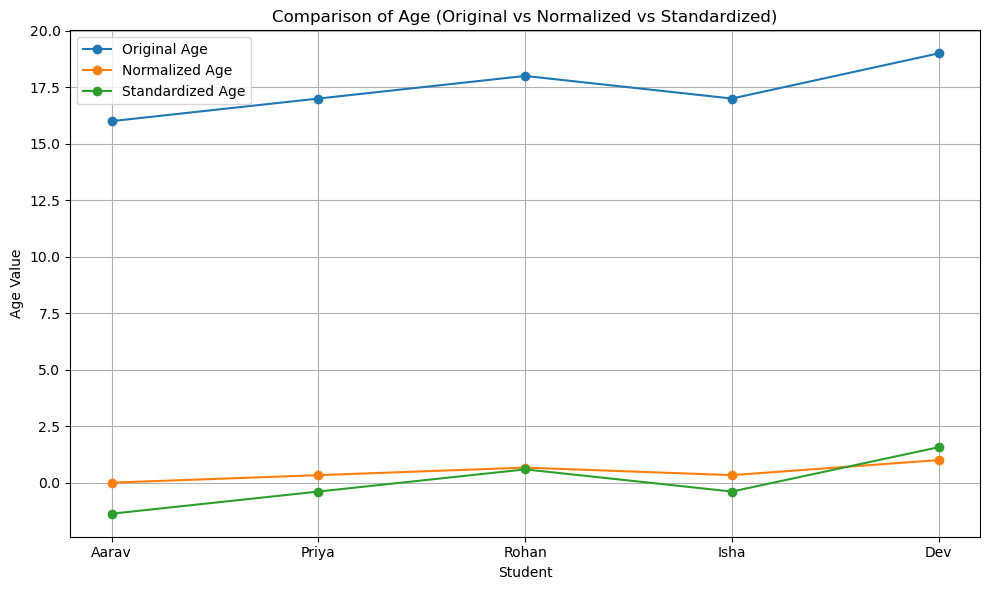

In [11]:
# Plot original vs normalized vs standardized for 'Age'
plt.figure(figsize=(10, 6))
plt.plot(df["Student"], df["Age"], marker='o', label='Original Age')
plt.plot(df["Student"], X_normalized["Age_Norm"], marker='o', label='Normalized Age')
plt.plot(df["Student"], X_standardized["Age_Std"], marker='o', label='Standardized Age')

plt.title("Comparison of Age (Original vs Normalized vs Standardized)")
plt.xlabel("Student")
plt.ylabel("Age Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
x = df["Study_Hours"].values.reshape(-1, 1)
x_log = np.log1p(x)

In [14]:
def rescale_to_0_1(data):
    return (data - data.min()) / (data.max() - data.min())

x_rescaled = rescale_to_0_1(x)
x_log_rescaled = rescale_to_0_1(x_log)

In [16]:
x_rescaled,x_log_rescaled

(array([[0.2],
        [0.6],
        [1. ],
        [0.4],
        [0. ]]),
 array([[0.32365668],
        [0.73141588],
        [1.        ],
        [0.55329476],
        [0.        ]]))

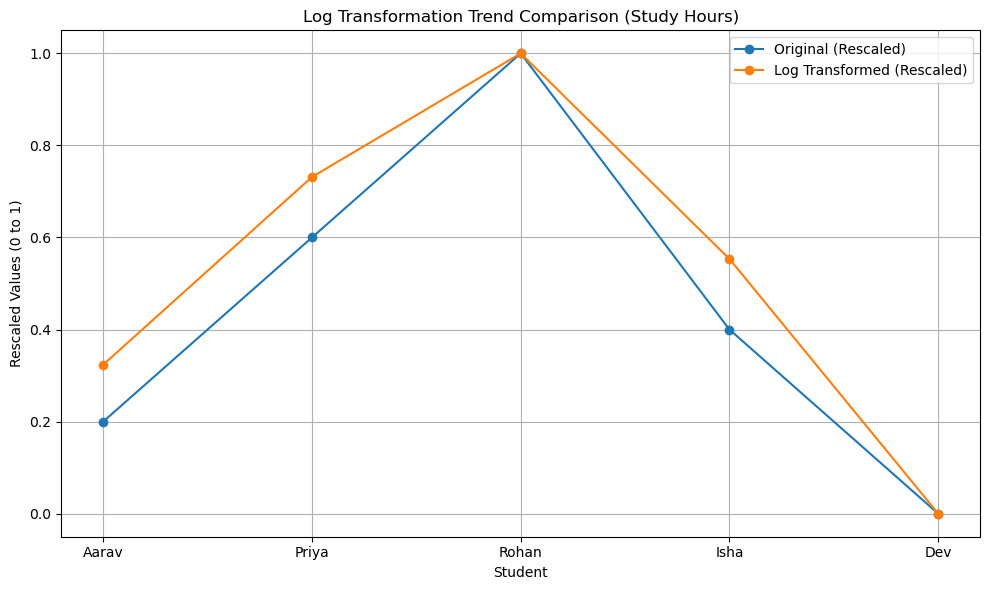

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df["Student"], x_rescaled, marker='o', label='Original (Rescaled)')
plt.plot(df["Student"], x_log_rescaled, marker='o', label='Log Transformed (Rescaled)')

plt.title("Log Transformation Trend Comparison (Study Hours)")
plt.xlabel("Student")
plt.ylabel("Rescaled Values (0 to 1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
df = pd.read_csv('power_transform.csv')

In [16]:
df

,Income,Debt,Net_Worth
0,23463.404499,-9102.381941,27647.430841
1,150506.071546,-8509.856889,145128.059396
2,65837.284677,-71015.174226,-11242.923431
3,45647.127689,-8612.315657,41593.853984
4,8481.243523,-9521.555270,-5631.214849
...,...,...,...
1995,53494.705031,-17507.644603,30695.050330
1996,156881.639298,-12212.044824,135976.724604
1997,3572.545375,-15054.604616,-11590.730611
1998,2937.351341,-22646.885444,-18336.009309


In [19]:
positive_features = ['Income']  # Box-Cox requires strictly positive values
all_features = ['Income', 'Debt', 'Net_Worth']  # Yeo-Johnson supports all real values

In [20]:
boxcox = PowerTransformer(method='box-cox')
df_boxcox = pd.DataFrame(boxcox.fit_transform(df[positive_features]), columns=[f"{col}_boxcox" for col in positive_features])

In [22]:
yeojohnson = PowerTransformer(method='yeo-johnson')
df_yeojohnson = pd.DataFrame(yeojohnson.fit_transform(df[all_features]), columns=[f"{col}_yeojohnson" for col in all_features])

In [23]:
df_yeojohnson

,Income_yeojohnson,Debt_yeojohnson,Net_Worth_yeojohnson
0,-0.302204,0.642364,0.203091
1,1.604304,0.690280,1.923269
2,0.646569,-1.345888,-0.466975
3,0.281508,0.681826,0.410847
4,-1.026825,0.609812,-0.341644
...,...,...,...
1995,0.435552,0.127126,0.248646
1996,1.657764,0.422370,1.790879
1997,-1.513273,0.254446,-0.474795
1998,-1.609591,-0.102620,-0.627282


C:\Users\Vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Income', ylabel='Count'>

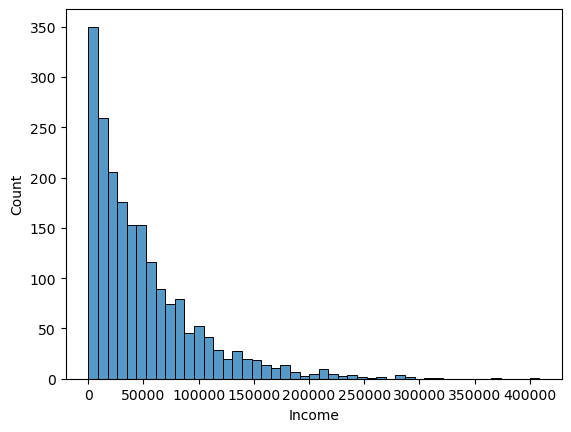

In [25]:
sns.histplot(df['Income'])

In [27]:
df_boxcox

,Income_boxcox
0,-0.302207
1,1.604320
2,0.646550
3,0.281489
4,-1.026789
...,...
1995,0.435531
1996,1.657783
1997,-1.513219
1998,-1.609538


C:\Users\Vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Income_boxcox', ylabel='Count'>

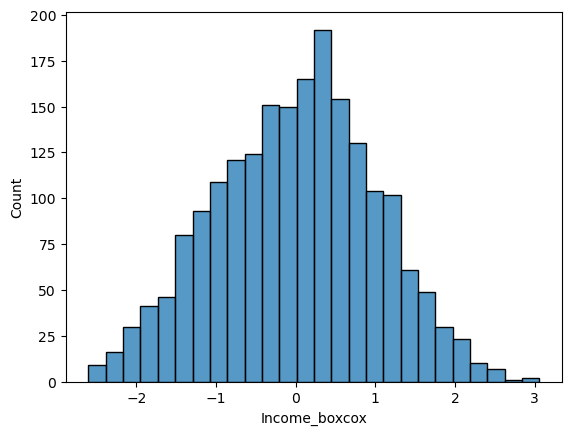

In [29]:
sns.histplot(df_boxcox['Income_boxcox'])

C:\Users\Vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Debt_yeojohnson', ylabel='Count'>

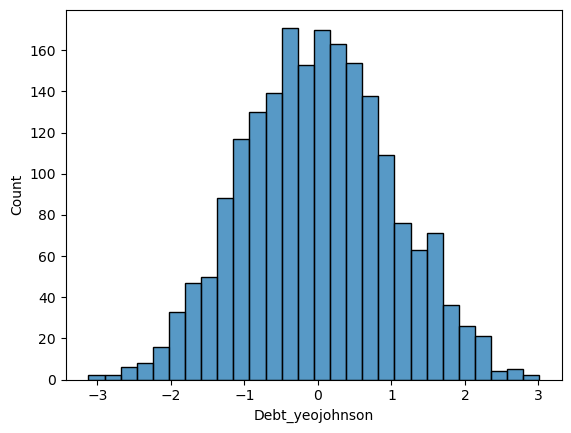

In [31]:
sns.histplot(df_yeojohnson['Debt_yeojohnson'])